# Data Exploration

In [29]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [30]:
# read in csv
speed_dating_data = pd.read_csv("Speed_Dating_Data.csv", encoding='ISO-8859-1')
sddf = speed_dating_data.copy()

In [31]:
# sets df to view all 195 columns of the data set
pd.set_option('display.max_columns', 200)

In [32]:
# sddf.info(max_cols=200)
sddf.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [33]:
# we have 8378 records, where each record is a date
sddf.shape

(8378, 195)

In [34]:
# convert number values for gender, race, race_o (aka race of partner) to text values
sddf['gender'] = sddf.gender.apply(lambda x: "female" if x==0 else "male")

race_map = {1:"Black/African American", 2:"European/Caucasian-American", 3:"Latino/Hispanic American", \
            4:"Asian/Pacific Islander/Asian-American", 5:"Native American", 6:"Other"}

sddf['race'] = sddf.race.map(race_map)
sddf['race_o'] = sddf.race_o.map(race_map)

In [35]:
#sddf.sample(n=5)

In [36]:
sample_sddf = sddf[(sddf.wave>=5) & (sddf.wave<=10)].sample(n=100)


In [37]:
wave6_9_sddf = sddf[(sddf.wave>=6) & (sddf.wave<=9)]

In [38]:
# list(sample_sddf.columns)

In [39]:
sample_sddf[['wave', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1',\
 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', \
 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']].sort_values('wave')

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
1833,5,80.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,20.00,10.00,10.00,NaN,NaN,5.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
1811,5,40.00,15.00,10.00,20.00,10.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,25.00,15.00,20.00,20.00,10.00,10.00,8.0,7.0,7.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1765,5,50.00,10.00,20.00,5.00,5.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,20.00,50.00,10.00,5.00,5.00,10.00,8.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
1691,5,20.00,10.00,30.00,20.00,15.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,40.00,10.00,20.00,20.00,0.00,10.00,8.0,7.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
1786,5,25.00,40.00,15.00,10.00,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,15.00,20.00,15.00,10.00,9.0,10.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN
1841,5,25.00,10.00,20.00,20.00,10.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,10.00,20.00,20.00,10.00,10.00,4.0,6.0,4.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
1794,5,25.00,40.00,15.00,10.00,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,15.00,20.00,15.00,10.00,9.0,10.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN
1699,5,15.00,15.00,25.00,25.00,20.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,5.00,10.00,30.00,5.00,20.00,8.0,9.0,8.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN
1868,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1863,6,18.18,22.73,18.18,13.64,13.64,13.64,8.0,8.0,8.0,9.0,9.0,7.0,18.75,16.67,14.58,18.75,18.75,12.50,9.0,10.0,7.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN


In [40]:
# sddf['wave', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
sample_sddf.attr1_1.describe()

count    99.000000
mean     18.351515
std      11.199167
min       7.500000
25%      14.000000
50%      16.070000
75%      20.000000
max      90.000000
Name: attr1_1, dtype: float64

In [41]:
wave6_9_sddf.attr1_1.describe()

count    1557.000000
mean       16.158304
std         3.515382
min         6.670000
25%        14.290000
50%        16.000000
75%        18.000000
max        27.780000
Name: attr1_1, dtype: float64

In [42]:
# gender = sddf['gender'].value_counts() 
# gender.plot(kind='bar', rot=0, figsize=(4,6), color)
# sns.plt.show()

# sns.barplot(x=sddf.gender.value_counts().index, y=sddf.gender.value_counts(), data=sddf, ci=None)
# sns.despine

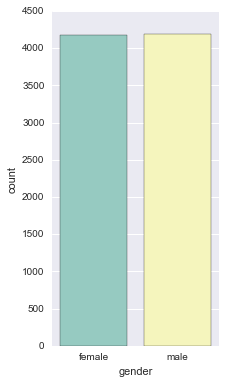

In [43]:
sns.set(rc={"figure.figsize": (3,6)})
sns.countplot(sddf.gender, palette='Set3')

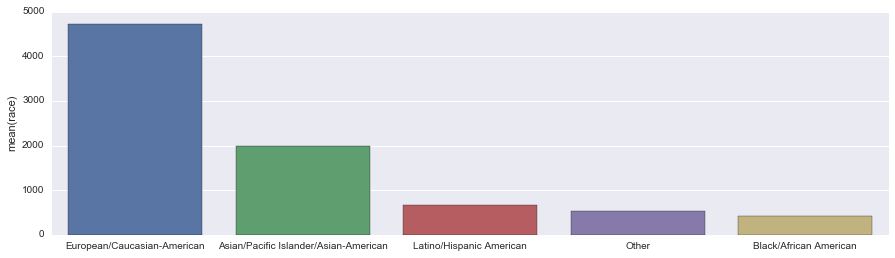

In [44]:
sns.set(rc={"figure.figsize": (15,4)})
b=sns.barplot(x=sddf.race.value_counts().index, y=sddf.race.value_counts(), data=sddf, ci=None )
b.set_xticklabels(b.get_xticklabels(), rotation=0)

# normal matplotlib plot
# race_plt = sddf['race'].value_counts()
# race_plt.plot(kind='bar', rot=45, figsize=(13,4), color=['b','r','y','g','c'])

In [45]:
# some people didn't report age, so need to drop NaN in the series
age_series = sddf.age.dropna()
age_series.shape

(8283,)

In [46]:
# see a distribution
# age_dist = sddf['age'].value_counts().sort_index()
# age_dist

# age_dist = pd.DataFrame()
# age_dist['age_dist_count'] = sddf.age.value_counts().sort_index()
# age_dist.index.name = 'age'
# age_dist

age_dist = sddf.groupby('age').size()
age_dist

age
18.0      10
19.0      20
20.0      55
21.0     291
22.0     655
23.0     894
24.0     863
25.0     837
26.0     869
27.0    1059
28.0     746
29.0     589
30.0     574
31.0     125
32.0     210
33.0     161
34.0     152
35.0      60
36.0      45
37.0       5
38.0      19
39.0      18
42.0      20
55.0       6
dtype: int64

/Users/Tony/Desktop/GA_DC12/Anaconda_3/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


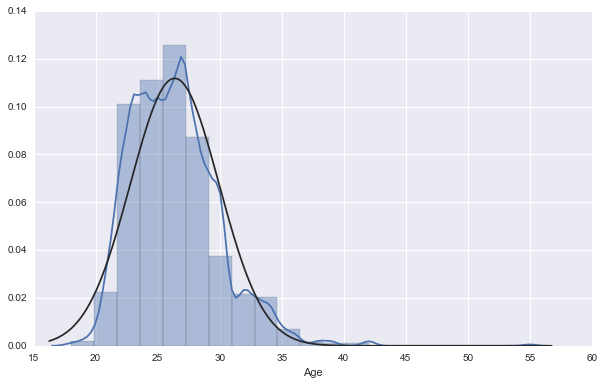

In [47]:
from scipy.stats import norm
sns.set(rc={"figure.figsize": (10,6)})
#sns.set_xticklabels([0,10,20,30,40,50,60])
sns.distplot(age_series, bins=20, hist=True, fit=norm, kde=True, axlabel="Age", norm_hist=True)

In [48]:
sddf.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,female,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,European/Caucasian-American,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,female,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,European/Caucasian-American,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,female,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN

In [73]:
sp_df = speed_dating_data[['gender','age','age_o','samerace','income','match']]
sp_df.dropna(inplace=True)
sp_df.sample(n=50)

/Users/Tony/Desktop/GA_DC12/Anaconda_3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,gender,age,age_o,samerace,income,match
5319,0,27.0,24.0,0,"36,223.00",1
5685,1,25.0,33.0,0,"66,827.00",0
1555,1,22.0,35.0,1,"23,361.00",0
482,0,23.0,27.0,1,"33,772.00",1
130,1,23.0,21.0,0,"56,580.00",1
5173,0,33.0,27.0,1,"35,963.00",1
1985,0,26.0,23.0,0,"41,831.00",0
5180,0,33.0,29.0,0,"35,963.00",1
3673,0,24.0,28.0,0,"62,997.00",0
4327,1,27.0,33.0,0,"53,196.00",0


ValueError: max must be larger than min in range parameter.

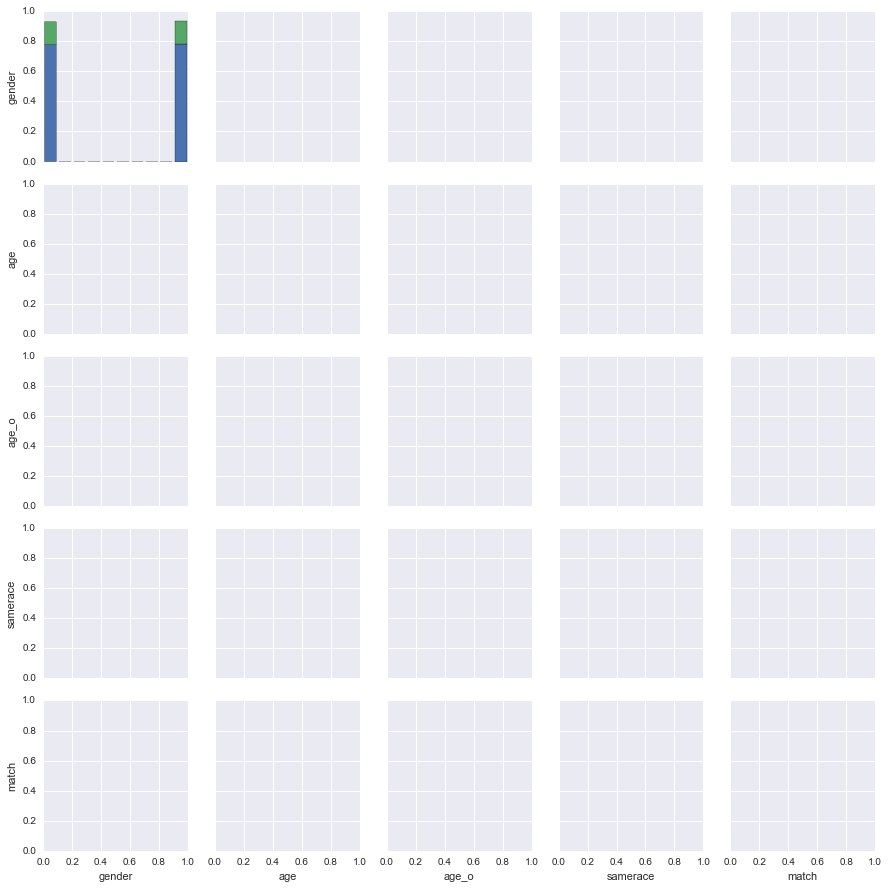

In [72]:
sns.pairplot(sp_df, hue="match")

# from pandas.tools.plotting import scatter_matrix